# Precio de las Casas en Boston

Trabajaremos con los dataset que vienen en la librería de Scikit-Learn. Entrenaremos modelos de Machine Learning: Regresión lineal simple y multilineal, para predecir el precio de las casas.

In [25]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns

## EDA
- 1. Carga y primer vistazo de los datos
- 2. Descripción estadística
- 3. Visualización de los datos
- 4. Análisis Multivariado (Correlaciones)

## 1. Carga y primer vistazo de los datos

In [14]:
#Importamos los datos de la librería Scikit-Learn
boston = datasets.load_boston()

#Buscamos cuales son las llaves del dataset para saber donde consultar la información
print('Llaves del dataset: ', boston.keys())

Llaves del dataset:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [15]:
#Descripción del dataset (conocemos el número y la descripción de las columnas, numero de registros, si hay valores nulos, etc. )
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [192]:
print('Cantidad de datos: ', boston.data.shape)
print('Columnas de datos: ', boston.feature_names)
print('Precios de las casas: ', boston.target.shape)

Cantidad de datos:  (506, 13)
Columnas de datos:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Precios de las casas:  (506,)


In [37]:
#Para una mejor manejo y visualización, lo pasamos a un dataframe
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Información obtenida:
- El dataset se compone de 13 columnas con 506 registros cada una sin valores perdidos por lo que no tendremos que hacer mucho preprocesamiento.
- Tenemos la descripción de cada columna.
- Hay una columna que aparece en DESC pero no está en la data y es la columna MEDV

## 2. Descripción estadística

In [35]:
#Tenemos que data-type tiene cada columna y si presenta valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [38]:
# Estadísticos de cada columna
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Información obtenida:
- Obtenemos los Dtype de cada columna y corroboramos que no presenta valores nulos.
- Todos los datos son numéricos continuos, salvo la columna Chas, esa es categórica binaria.
- Obtenemos los principales estadísticos de todas las columnas.

## 3. Visualización de los datos

In [80]:
#Casi todo los datos son numéricos continuos, por lo que ocuparemos histogramas y gráficas de caja y brazo para visualizarlos
def hist_boxplot(column, description):
    fig, (ax1,ax2)  = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

    sns.histplot( ax = ax1, data = df, x = column , kde = True, color = 'darkblue')
    ax1.set_title('Histogram - ' + description)
    ax1.set_xlabel(column)

    sns.boxplot( ax = ax2, data = df, y = column, color = 'slateblue')
    ax2.set_title('Boxplot - ' + description)
    ax2.set_ylabel(column)

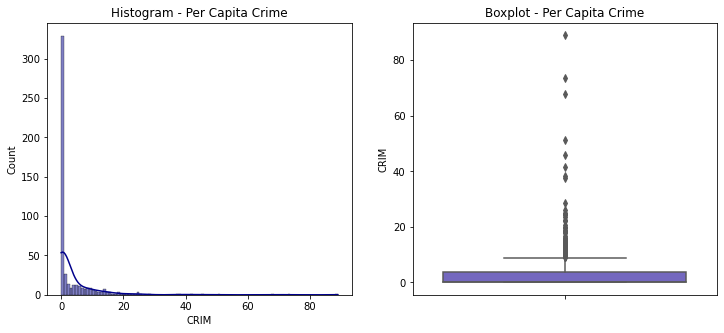

In [81]:
# CRIM - Crimen per capita
hist_boxplot('CRIM', 'Per Capita Crime')

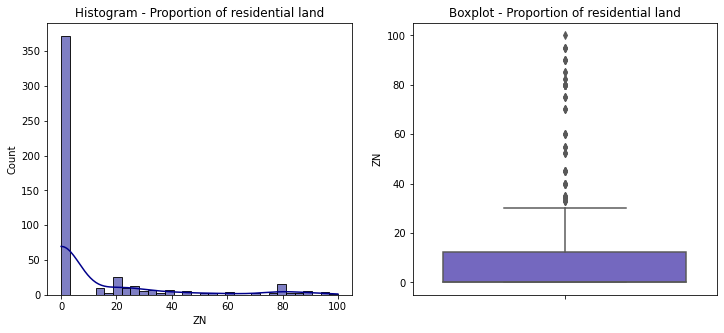

In [82]:
# ZN - Proporcion de suelo residencial
hist_boxplot('ZN', 'Proportion of residential land')

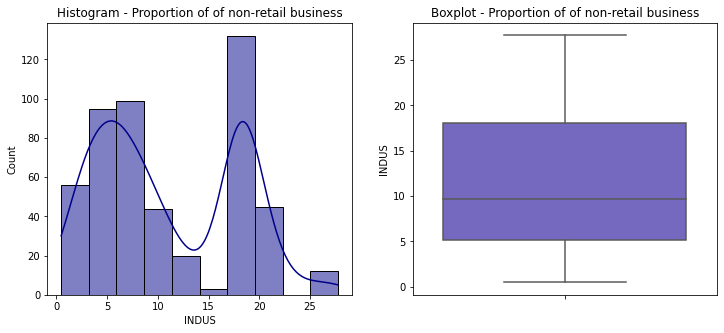

In [83]:
# INDUS - Proporcion de zonas industriales o fabricas
hist_boxplot('INDUS', 'Proportion of of non-retail business')

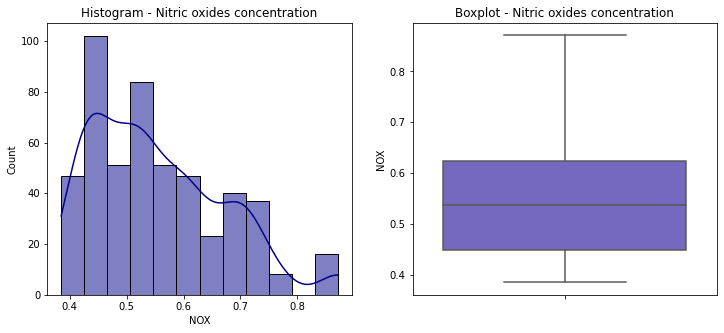

In [84]:
# NOX - concentración de óxidos nítricos (partes por 10 millones)
hist_boxplot('NOX', 'Nitric oxides concentration')

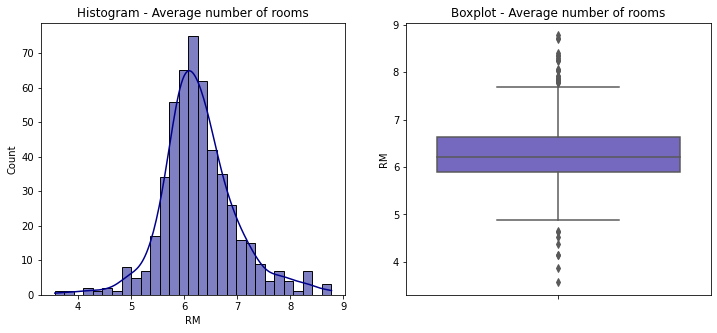

In [85]:
# RM - promedio de habitaciones por vivienda
hist_boxplot('RM', 'Average number of rooms')

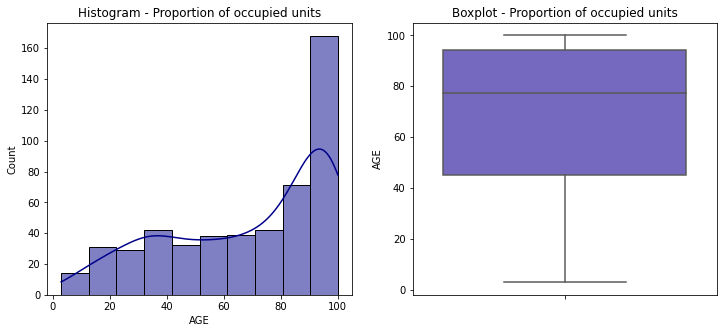

In [86]:
# AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
hist_boxplot('AGE', 'Proportion of occupied units')

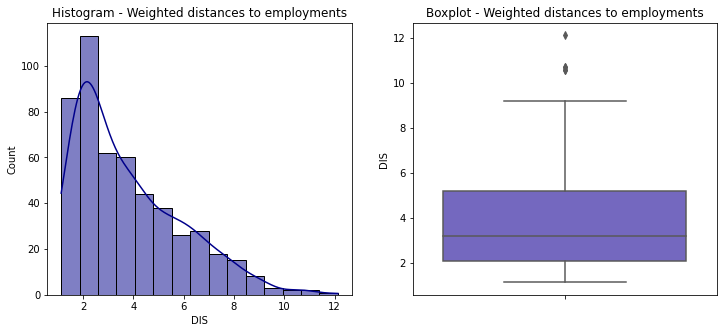

In [87]:
# DIS - distancias ponderadas a cinco centros de empleo de Boston
hist_boxplot('DIS', 'Weighted distances to employments')

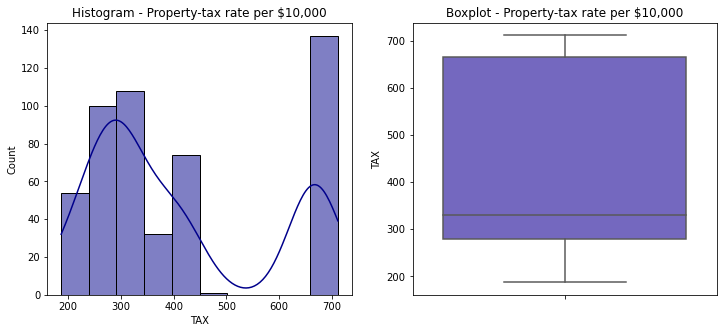

In [88]:
# TAX - Impuesto sobre la propiedad por cada $10000
hist_boxplot('TAX', 'Property-tax rate per $10,000')

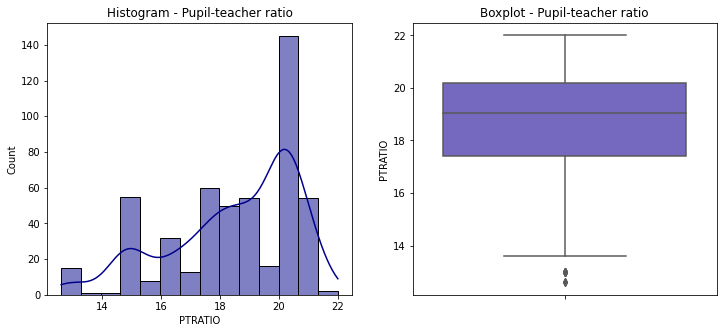

In [89]:
# PTRATIO - Proporción de alumnos por maestro
hist_boxplot('PTRATIO', 'Pupil-teacher ratio')

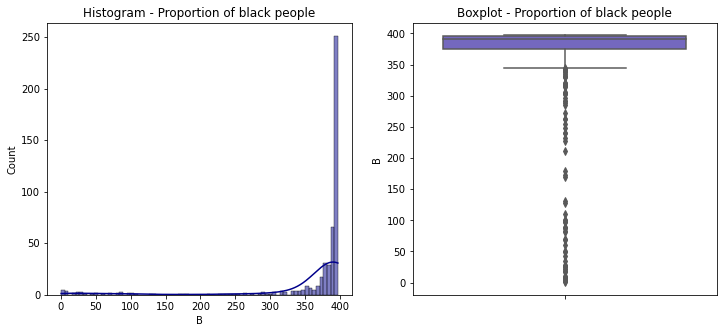

In [90]:
# B - Proporción de gente de color
hist_boxplot('B', 'Proportion of black people')

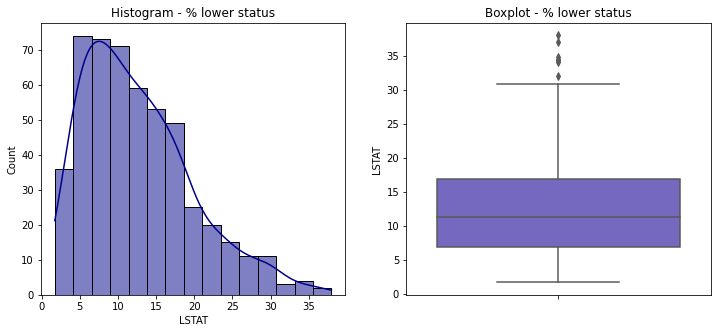

In [92]:
# LSTAT - % porcentaje de personas con estatus bajo
hist_boxplot('LSTAT', '% lower status')

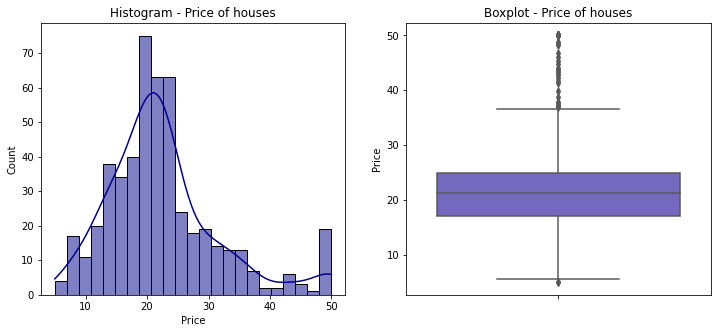

In [93]:
# Price - Precio de las casas
hist_boxplot('Price', 'Price of houses')

Información obtenida:
- Visualizamos que algunas de las distribuciones se distribuye de forma normal, la más evidente es la del promedio de las habitaciones (RM) y el precio de las casa (Price); el cual, es un atributo necesario que deben tener los datos para poder entrenar al algoritmo de regresión lineal
- Otras que tienen una distribución normal pero sesgada hacia a la derecha son la tasa de crimen (CRIM), la proporción de terreno residencial (ZN), la distancia a centros de empleo (DIST) y el porcentaje de personas con estatus bajo (LSTAT). También tenemos sesgadas a la derecha como el impuesto a la propiedad (TAX)

## 4. Análisis Multivariado (Correlaciones)

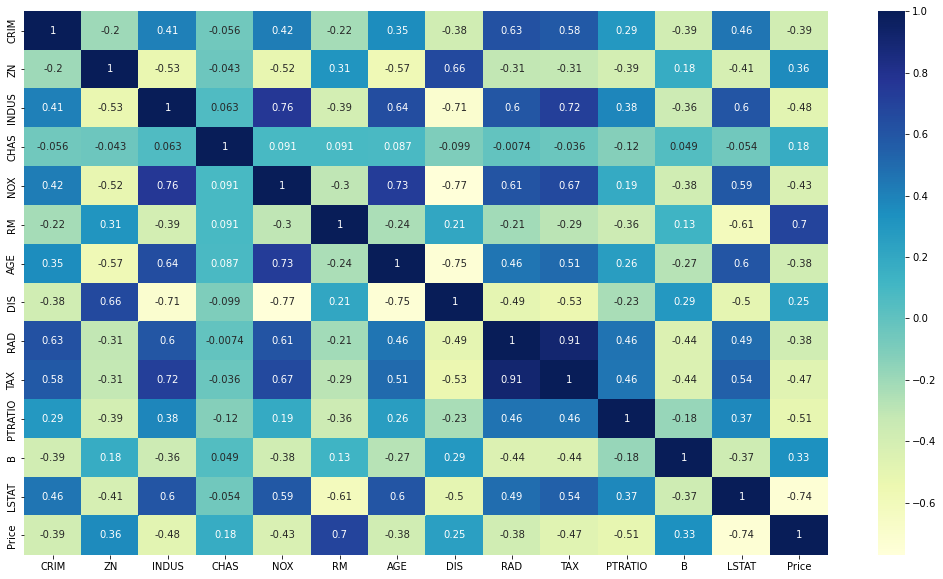

In [95]:
# Matriz de correlacion
fig = plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

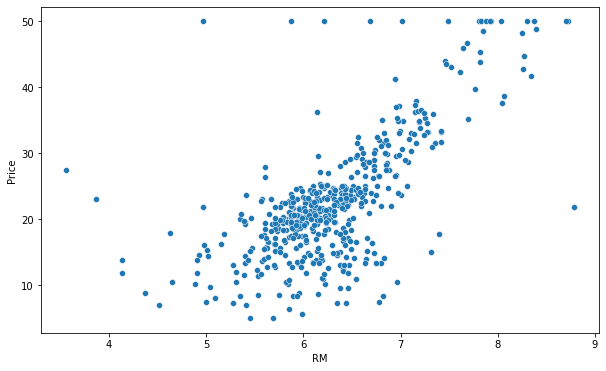

In [97]:
# Precio vs Número de habitaciones
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'RM', y = 'Price')
plt.show()

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

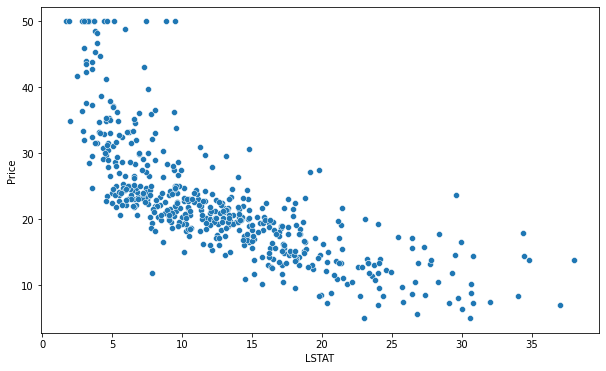

In [100]:
# Precio vs % de personas con estatus bajo
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'LSTAT', y = 'Price')

<AxesSubplot:xlabel='TAX', ylabel='Price'>

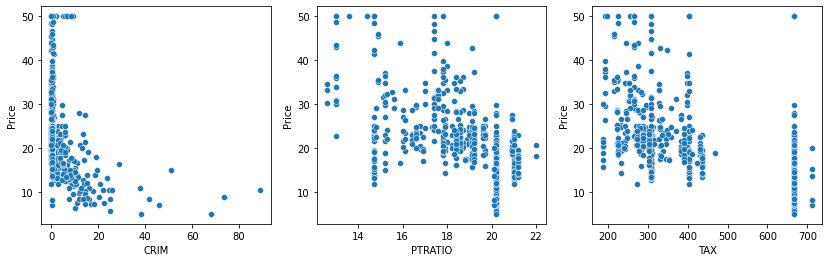

In [103]:
# Precio vs Tasa de crimen, Alumnos por cada profesor, Impuesto por cada $10000
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))

sns.scatterplot(ax = ax1, data = df, x = 'CRIM', y = 'Price')
sns.scatterplot(ax = ax2, data = df, x = 'PTRATIO', y = 'Price')
sns.scatterplot(ax = ax3, data = df, x = 'TAX', y = 'Price')

Información obtenida:
- Visualizamos una alta correlación positiva entre el precio y el número de habitaciones
- Visualizamos una alta correlación negativa entre el precio y el porcentaje de personas con status
- Al realizar las gráficas de dispersión se visualizan valores extremos dado por los precios más altos por lo que los eliminaremos en el preporcesamiento para tener mejores resultados

# PREPROCESAMIENTO

In [127]:
#Creamos un nuevo dataframe que solo incluya las columnas de interes y sin los valores extremos en los precios.
# Nos quedaremos con los precios menores al percentil 95 
df_procesado = df.loc[df['Price'] <= df['Price'].quantile(0.95)]
df_procesado = df_procesado[['RM','LSTAT','Price']]

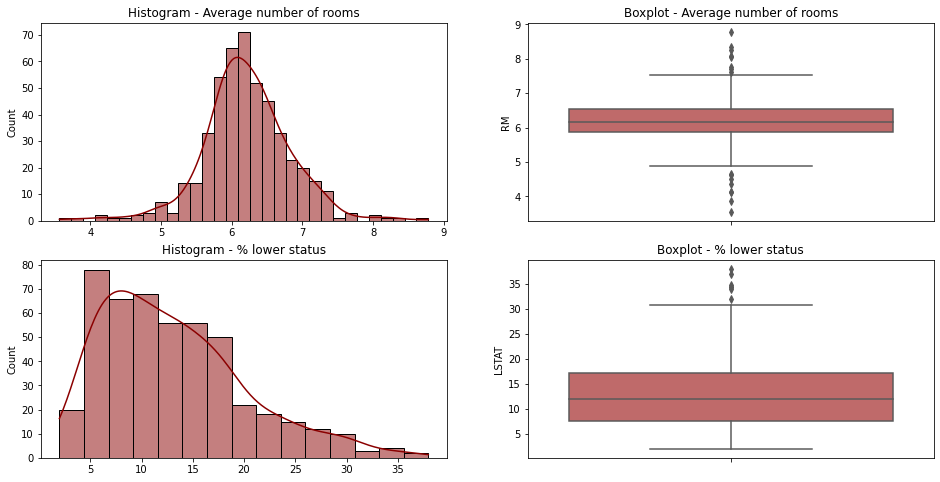

In [128]:
#graficamos
fig, ax  = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8))

sns.histplot( ax = ax[0,0], data = df_procesado, x = 'RM' , kde = True, color = 'darkred')
ax[0,0].set_title('Histogram - Average number of rooms')
ax[0,0].set_xlabel('')

sns.boxplot( ax = ax[0,1], data = df_procesado, y = 'RM', color = 'indianred')
ax[0,1].set_title('Boxplot - Average number of rooms')
ax[0,1].set_ylabel('RM')

sns.histplot( ax = ax[1,0], data = df_procesado, x = 'LSTAT' , kde = True, color = 'darkred')
ax[1,0].set_title('Histogram - % lower status')
ax[1,0].set_xlabel('')

sns.boxplot( ax = ax[1,1], data = df_procesado, y = 'LSTAT', color = 'indianred')
ax[1,1].set_title('Boxplot - % lower status')
ax[1,1].set_ylabel('LSTAT')

plt.show()

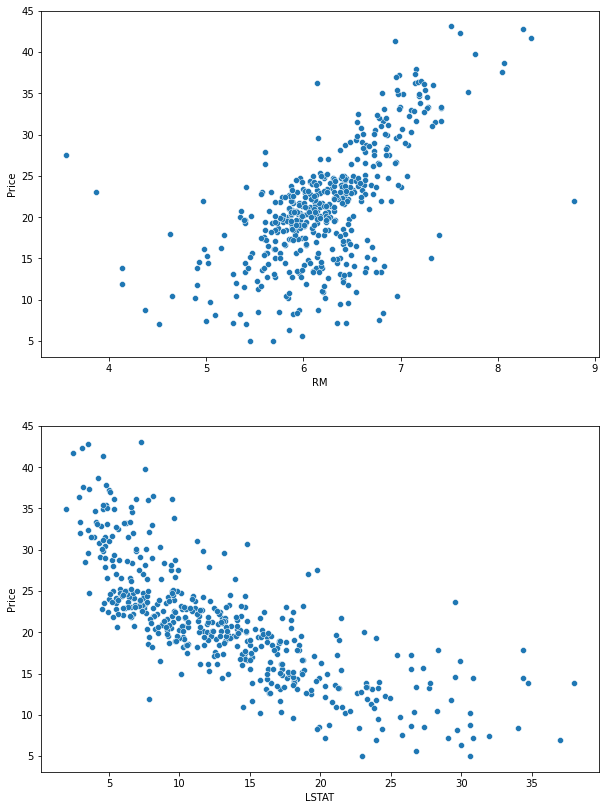

In [129]:
# Graficas de dispersión
fig, (ax1,ax2)  = plt.subplots(nrows = 2, ncols = 1, figsize = (10,14))

sns.scatterplot(ax = ax1, data = df_procesado, x = 'RM', y = 'Price')

sns.scatterplot(ax = ax2, data = df_procesado, x = 'LSTAT', y = 'Price')

plt.show()

Información obtenida:
- En las gráficas de dispersión ya no se visualizan los outliers de los precioes por lo que trabajaremos con estos datos procesados para el modelo de regresión lineal simple

# MODELO DE MACHINE LEARNING

## Regresión Lineal Simple

En base al EDA y al preprocesamiento realizado, hemos adaptado los datos para el correcto entrenamiento de un algoritmo de regresión lineal simple.
Donde las variables dependientes e independientes están altamente correlacionadas, además de que sus datos se distribuyen de forma normal y no presentan demasiados valores extremos que dificulten el aprendizaje del modelo. 

### Precio vs Número de habitaciones

In [185]:
# Separamos los datos de entrenamiento y prueba, tomando un 20% de los datos para la prueba
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['RM'], df_procesado['Price'],test_size = 0.20)

#Reordenamos los datos para que puedan ser entrenados por el modelo
X_train1 = X_train1.values.reshape(-1,1)
X_test1 = X_test1.values.reshape(-1,1)
Y_train1 = Y_train1.values.reshape(-1,1)
Y_test1 = Y_test1.values.reshape(-1,1)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train1, Y_train1)

#Obtengo los resultados de la prediccion
m1 = lr.coef_
b1 = lr.intercept_

In [188]:
#Resultados del modelo
print("Pendiente e intersección:")
print(m1,b1)
print()
print("Precisión del modelo R^2:")
print(lr.score(X_train1,Y_train1))

Pendiente e intersección:
[[7.73079627]] [-26.86970327]

Precisión del modelo R^2
0.4360905598003968


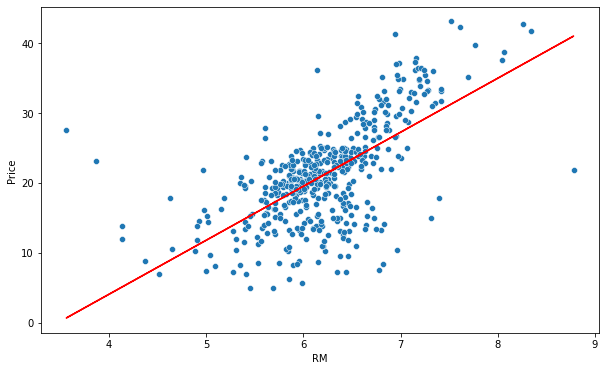

In [187]:
#Garficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_procesado, x = 'RM', y = 'Price')
plt.plot(df_procesado['RM'].values.reshape(-1,1), m1 * df_procesado['RM'].values.reshape(-1,1) + b1, color = 'r')
plt.show()

In [203]:
# Modelo sin preprocesamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df['RM'], df['Price'],test_size = 0.20)

#Reordenamos los datos para que puedan ser entrenados por el modelo
X_train2 = X_train2.values.reshape(-1,1)
X_test2 = X_test2.values.reshape(-1,1)
Y_train2 = Y_train2.values.reshape(-1,1)
Y_test2 = Y_test2.values.reshape(-1,1)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train2, Y_train2)

#Obtengo los resultados de la prediccion
m2 = lr.coef_
b2 = lr.intercept_

In [204]:
#Resultados del modelo
print("Pendiente e intersección:")
print(m2,b2)
print()
print("Precisión del modelo R^2:")
print(lr.score(X_train2,Y_train2))

Pendiente e intersección:
[[8.97860349]] [-34.01601752]

Precisión del modelo R^2:
0.48496504942454155


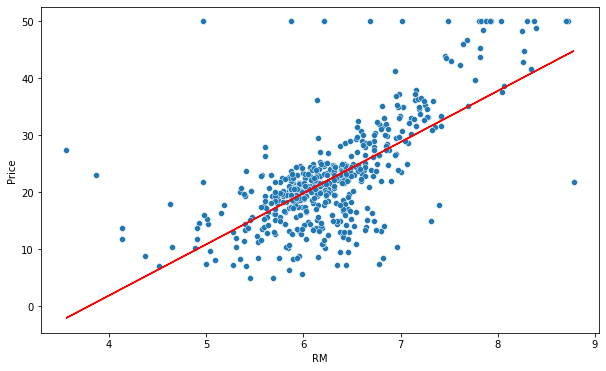

In [205]:
#Garficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'RM', y = 'Price')
plt.plot(df['RM'].values.reshape(-1,1), m2 * df['RM'].values.reshape(-1,1) + b2, color = 'r')
plt.show()

### Precio vs % de personas con estatus bajo

In [193]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(df_procesado['LSTAT'], df_procesado['Price'],test_size = 0.20)

#Reordenamos los datos para que puedan ser entrenados por el modelo
X_train1 = X_train1.values.reshape(-1,1)
X_test1 = X_test1.values.reshape(-1,1)
Y_train1 = Y_train1.values.reshape(-1,1)
Y_test1 = Y_test1.values.reshape(-1,1)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train1, Y_train1)

#Obtengo los resultados de la prediccion
m1 = lr.coef_
b1 = lr.intercept_

In [197]:
#Resultados del modelo
print("Pendiente e intersección:")
print(m1,b1)
print()
print("Precisión del modelo R^2:")
print(lr.score(X_train2,Y_train2))

Pendiente e intersección:
[[-0.79176276]] [31.49985628]

Precisión del modelo R^2:
-0.3075395394225551


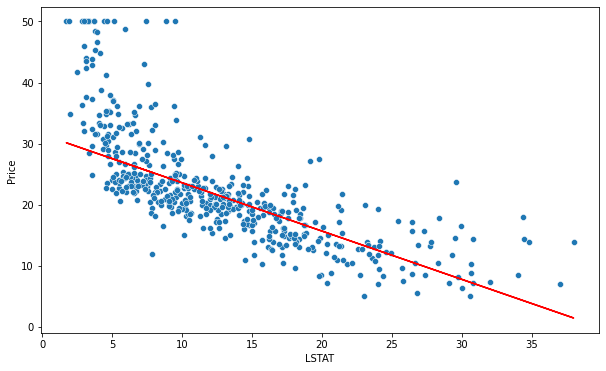

In [198]:
#Garficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'LSTAT', y = 'Price')
plt.plot(df['LSTAT'].values.reshape(-1,1), m1 * df['LSTAT'].values.reshape(-1,1) + b1, color = 'r')
plt.show()

In [199]:
# Modelo sin preprocesamiento
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df['LSTAT'], df['Price'],test_size = 0.20)

#Reordenamos los datos para que puedan ser entrenados por el modelo
X_train2 = X_train2.values.reshape(-1,1)
X_test2 = X_test2.values.reshape(-1,1)
Y_train2 = Y_train2.values.reshape(-1,1)
Y_test2 = Y_test2.values.reshape(-1,1)

#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

#Entreno el modelo
lr.fit(X_train2, Y_train2)

#Obtengo los resultados de la prediccion
m2 = lr.coef_
b2 = lr.intercept_

In [200]:
#Resultados del modelo
print("Pendiente e intersección:")
print(m2,b2)
print()
print("Precisión del modelo R^2:")
print(lr.score(X_train2,Y_train2))

Pendiente e intersección:
[[-0.90891068]] [34.21787613]

Precisión del modelo R^2:
0.5422994578498841


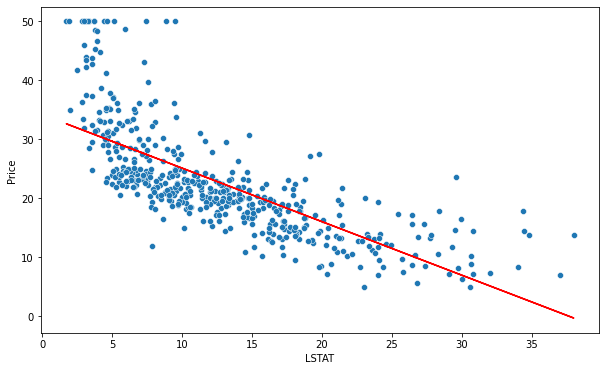

In [201]:
#Garficamos
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'LSTAT', y = 'Price')
plt.plot(df['LSTAT'].values.reshape(-1,1), m2 * df['LSTAT'].values.reshape(-1,1) + b2, color = 'r')
plt.show()